<a href="https://colab.research.google.com/github/yashraj195/E-Commerce-Analysis/blob/main/E_Commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-Commerce data Analysis**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
df = pd.read_csv('Online-eCommerce.csv')
df.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [3]:
df.describe()

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,141921.000000,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,1470.944141,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,139374.000000,350.000000,455.000000,1.000000,350.000000,455.000000
25%,140647.500000,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,141921.000000,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,143194.500000,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,144468.000000,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


In [6]:
df.drop_duplicates(inplace=True)

## Data Exploration and Cleaning

In [7]:
print("\nMissing Values by Column:")
print(df.isnull().sum())

print("\nPercentage of Missing Values:")
print(df.isnull().mean() * 100)


Missing Values by Column:
Order_Number           1
State_Code             1
Customer_Name          1
Order_Date             1
Status                 1
Product                1
Category               1
Brand                  1
Cost                   1
Sales                  1
Quantity               1
Total_Cost             1
Total_Sales            1
Assigned Supervisor    1
dtype: int64

Percentage of Missing Values:
Order_Number           0.019623
State_Code             0.019623
Customer_Name          0.019623
Order_Date             0.019623
Status                 0.019623
Product                0.019623
Category               0.019623
Brand                  0.019623
Cost                   0.019623
Sales                  0.019623
Quantity               0.019623
Total_Cost             0.019623
Total_Sales            0.019623
Assigned Supervisor    0.019623
dtype: float64


In [8]:
categorical_columns = ['State_Code', 'Category', 'Brand', 'Status']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())



Unique values in State_Code:
['AP' 'AS' 'BR' 'CG' nan 'JK' 'JH' 'KA' 'KL' 'MN' 'ML' 'MZ' 'NL' 'OR' 'PB'
 'RJ' 'SK' 'TN' 'TR' 'UK' 'UP' 'WB' 'AN' 'CH' 'AR' 'GA' 'GJ' 'MP' 'MH'
 'DH' 'DD' 'DL' 'LD' 'PY' 'HR' 'HP']

Unique values in Category:
['SSD' 'CPU' 'Graphic Card' 'RAM' 'MotherBoard' 'Cabinet' 'Keyboard' nan
 'Mouse' 'Monitor' 'HDD' 'Computer Case' 'NIC' 'Printer' 'Motherboard']

Unique values in Brand:
['Samsung' 'Intel' 'Nvidia' 'Hynix' 'Gigabyte' 'Asus' 'Dell' nan 'Seagate'
 'MSI' 'Acer' 'Western Digital']

Unique values in Status:
['Delivered' 'Order' nan 'Processing' 'Shipped']


In [9]:
print("\nOrder Date Format Example:")
print(df['Order_Date'].head())

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
print("\nInvalid Dates (if any):")
print(df[df['Order_Date'].isnull()])



Order Date Format Example:
0    11/01/2020
1    11/01/2020
2    11/01/2020
3    11/01/2020
4    11/01/2020
Name: Order_Date, dtype: object

Invalid Dates (if any):
      Order_Number State_Code          Customer_Name Order_Date      Status  \
7              NaN        NaN                    NaN        NaT         NaN   
10        139382.0         CG  Rahul Kumar Prajapati        NaT       Order   
11        139383.0         JK             Sagar Jeur        NaT       Order   
13        139384.0         JH        Rhushikesh Mane        NaT       Order   
14        139385.0         KA           Ashish Kumar        NaT       Order   
...            ...        ...                    ...        ...         ...   
5105      144464.0         TN  Rahul Kumar Prajapati        NaT   Delivered   
5106      144465.0         TR             Sagar Jeur        NaT     Shipped   
5107      144466.0         UK        Rhushikesh Mane        NaT       Order   
5108      144467.0         UP           Ashis

In [10]:
df['Profit'] = df['Total_Sales'] - df['Total_Cost']
df['Order_Month'] = df['Order_Date'].dt.to_period('M')
df['Order_Year'] = df['Order_Date'].dt.year

df['Customer_Segment'] = pd.cut(df['Total_Sales'],
                                bins=[0, 500, 2000, np.inf],
                                labels=['Low', 'Medium', 'High'])

print(df.head())

   Order_Number State_Code   Customer_Name Order_Date     Status  \
0      139374.0         AP     Adhir Samal 2020-11-01  Delivered   
1      139375.0         AP  Dannana Jhammi 2020-11-01  Delivered   
2      139376.0         AS     Vipin Kumar 2020-11-01  Delivered   
3      139377.0         BR   Ranjeet Kumar 2020-11-01  Delivered   
4      139378.0         CG   Sajal Singhal 2020-11-01      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  Profit Order_Month  \
0       1.0      6500.0       8450.0         Ajay Sharma  1950.0     2020-11  

## Data Visualization

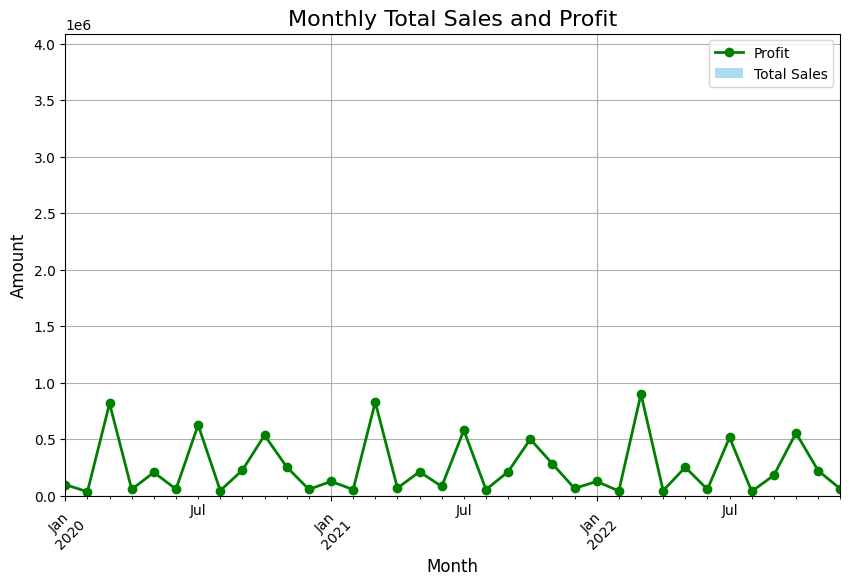

In [13]:
monthly_kpis = df.groupby('Order_Month').agg({'Total_Sales': 'sum', 'Profit': 'sum'})

plt.figure(figsize=(10, 6))
monthly_kpis['Total_Sales'].plot(kind='bar', label='Total Sales', color='skyblue', alpha=0.7)
monthly_kpis['Profit'].plot(kind='line', marker='o', label='Profit', color='green', linewidth=2)

plt.title('Monthly Total Sales and Profit', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

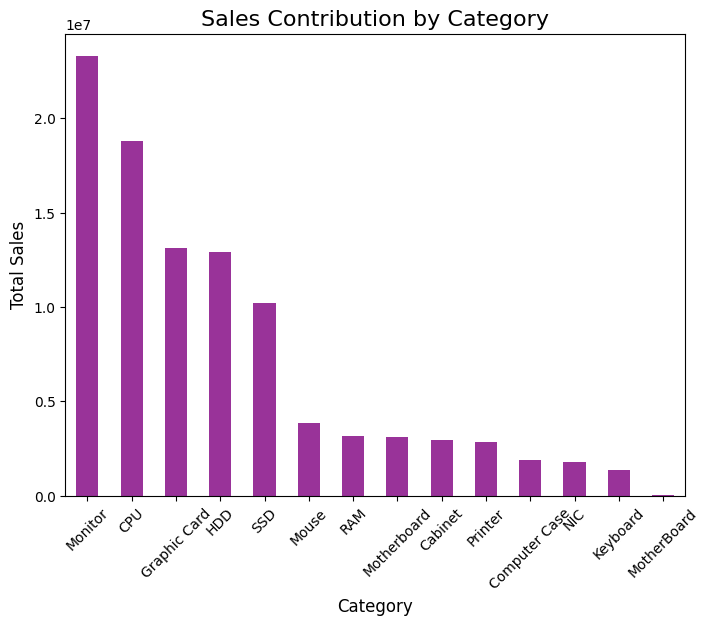

In [14]:
category_sales = df.groupby('Category')['Total_Sales'].sum()

#bar chart
plt.figure(figsize=(8, 6))
category_sales.sort_values(ascending=False).plot(kind='bar', color='purple', alpha=0.8)
plt.title('Sales Contribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

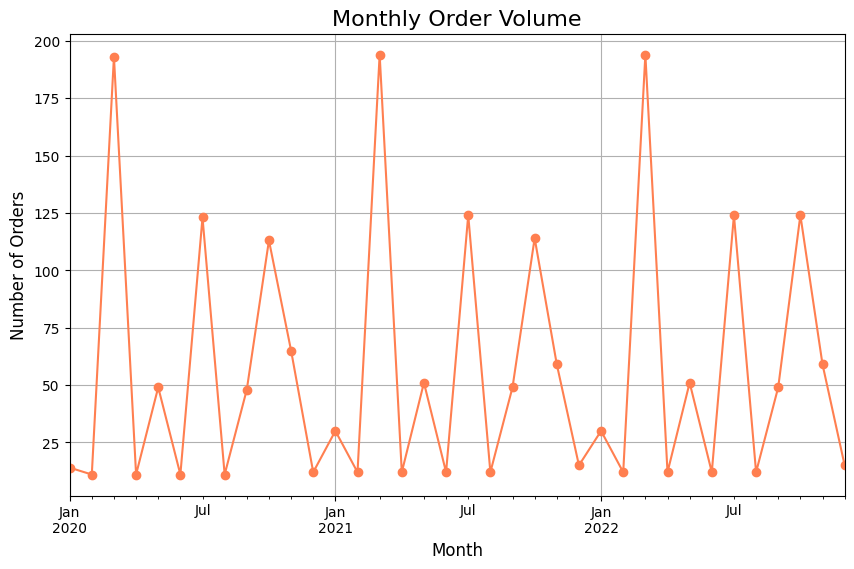

In [15]:
monthly_orders = df.groupby('Order_Month').size()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o', color='coral')
plt.title('Monthly Order Volume', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid()
plt.show()

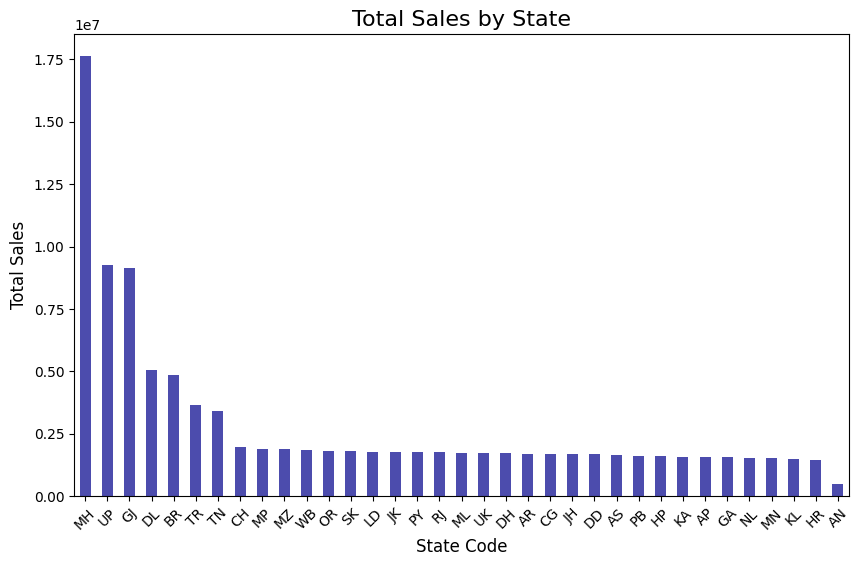

In [17]:
state_sales = df.groupby('State_Code')['Total_Sales'].sum()

plt.figure(figsize=(10, 6))
state_sales.sort_values(ascending=False).plot(kind='bar', color='darkblue', alpha=0.7)
plt.title('Total Sales by State', fontsize=16)
plt.xlabel('State Code', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()

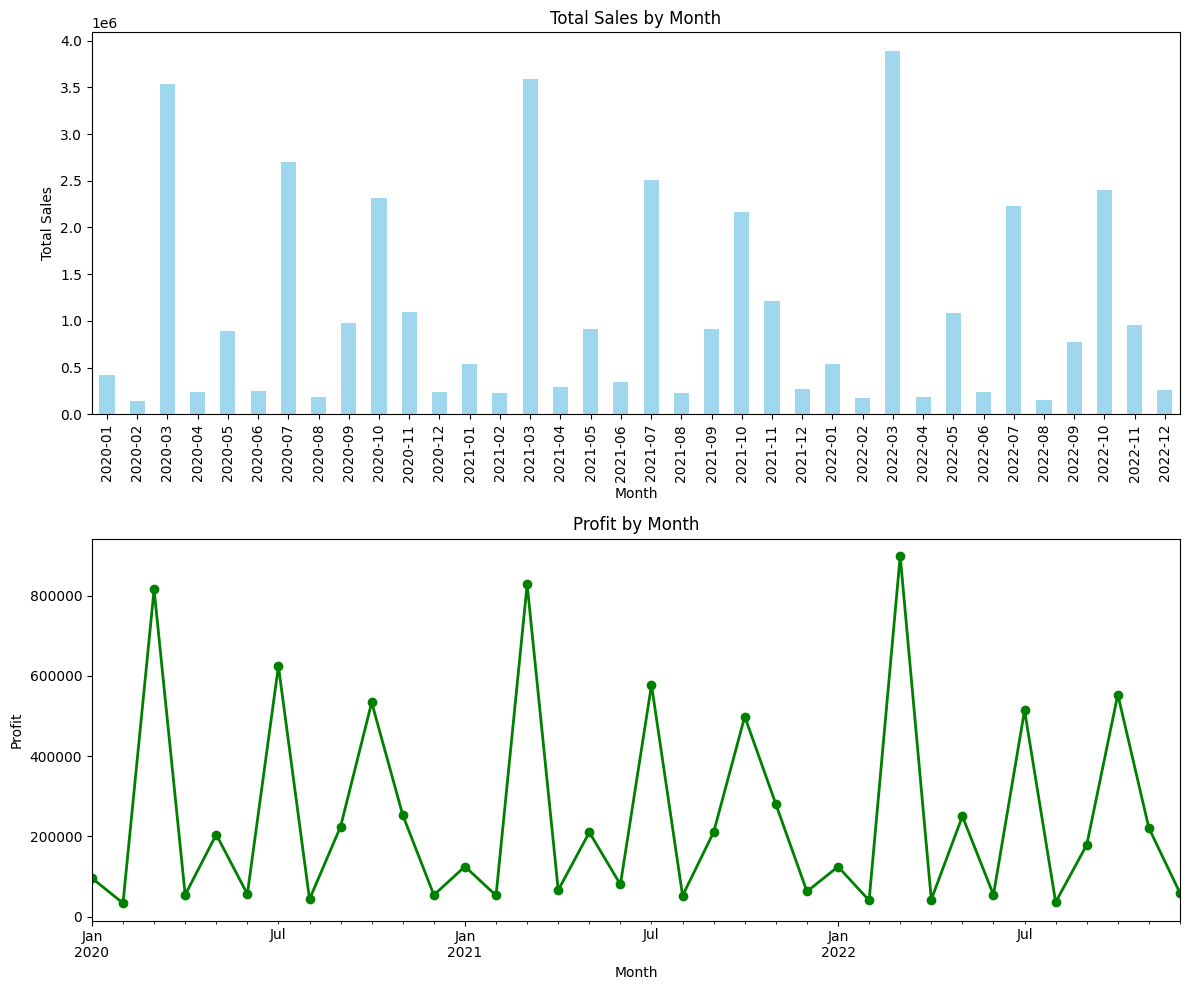

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

monthly_kpis['Total_Sales'].plot(kind='bar', ax=axs[0], color='skyblue', alpha=0.8)
axs[0].set_title('Total Sales by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Sales')

monthly_kpis['Profit'].plot(kind='line', ax=axs[1], marker='o', color='green', linewidth=2)
axs[1].set_title('Profit by Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Profit')

plt.tight_layout()
plt.show()


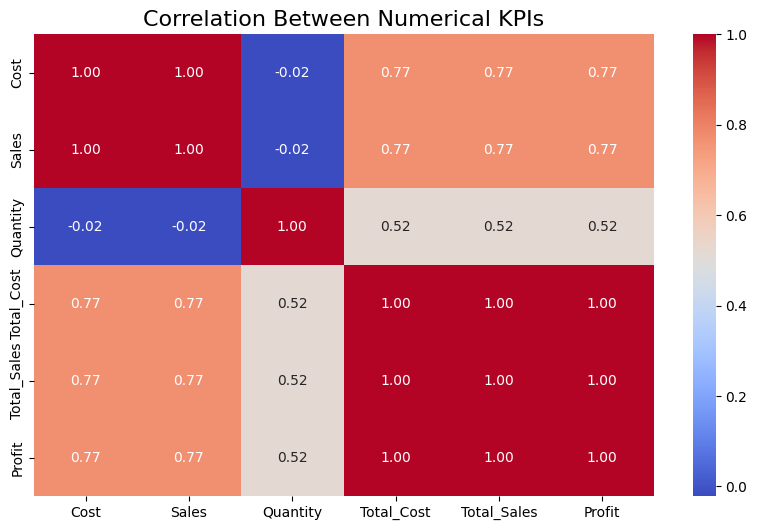

In [28]:
plt.figure(figsize=(10, 6))
correlation = df[['Cost', 'Sales', 'Quantity', 'Total_Cost', 'Total_Sales', 'Profit']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical KPIs', fontsize=16)
plt.show()

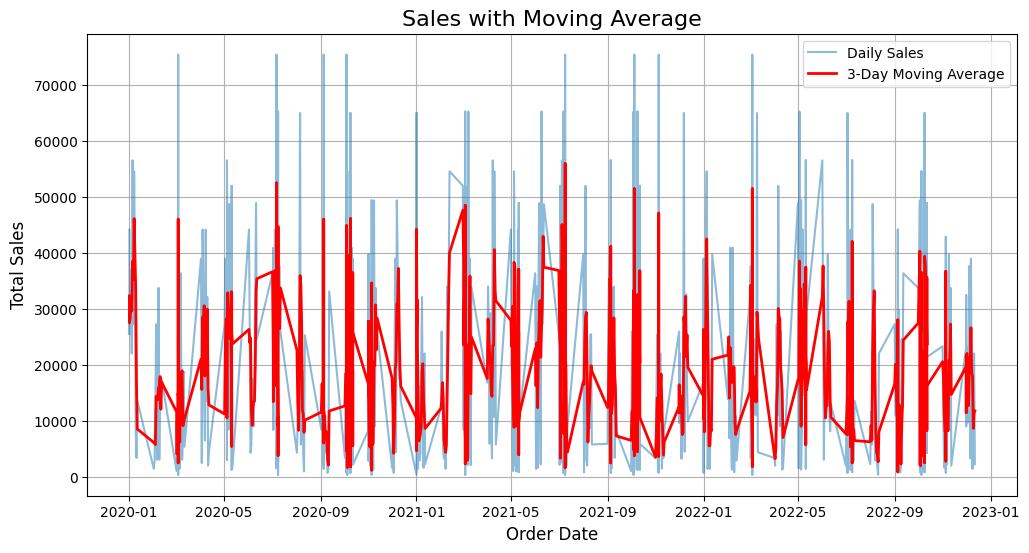

In [30]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df = df.sort_values('Order_Date')
df['Moving_Avg_Sales'] = df['Total_Sales'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Order_Date'], df['Total_Sales'], label='Daily Sales', alpha=0.5)
plt.plot(df['Order_Date'], df['Moving_Avg_Sales'], label='3-Day Moving Average', color='red', linewidth=2)
plt.title('Sales with Moving Average', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend()
plt.grid()
plt.show()


**END**